In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Read the csv file into a pandas DataFrame
songs_csv ="../../Resources/songs_with_popularity_trimmed.csv"
songs_df = pd.read_csv(songs_csv, index_col=0)
# songs_df.columns
songs_df = songs_df.dropna()
songs_df = songs_df.sort_values(by=['popularity'], ascending=False)
songs_df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
7942,4saklk6nie3yiGePpBwUoc,0.746,0.765,6.0,-4.410,0.0,0.0993,0.01120,0.000000,0.0936,0.737,114.044,199054.0,4.0,86.0
10862,3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10.0,-5.892,0.0,0.0712,0.28400,0.000000,0.4050,0.756,100.024,218093.0,4.0,82.0
7935,249gnXrbfmV8NG6jTEMSwD,0.566,0.716,1.0,-5.733,1.0,0.0424,0.00691,0.000000,0.3700,0.450,81.068,207481.0,4.0,82.0
8151,1mKXFLRA179hdOWQBwUk9e,0.778,0.547,2.0,-7.273,1.0,0.0489,0.34600,0.000302,0.1320,0.441,95.002,242733.0,4.0,81.0
9000,20McUFi8KCIVdNDLrkTDuZ,0.767,0.659,1.0,-7.429,1.0,0.0444,0.32500,0.000000,0.1300,0.439,124.946,163208.0,4.0,79.0


In [3]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
# X = songs_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']]
# X = songs_df[['danceability', 'energy', 'key', 'loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]
X = songs_df[['danceability', 'energy', 'loudness','valence','tempo','time_signature']]
y = songs_df["popularity"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(74078, 6) (74078, 1)


In [4]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)
### END SOLUTION

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [6]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [7]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

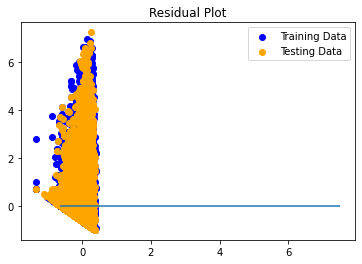

In [8]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0025085294639413, R2: 0.033780337486956635


## LASSO model ##

In [10]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0031712312794685, R2: 0.03314162419352684


## Ridge model ##

In [11]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0025085297591674, R2: 0.03378033720241713


## ElasticNet model ##

In [12]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.002894311244683, R2: 0.03340852025943508
